In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene, kruskal, shapiro, pearsonr, spearmanr
import statsmodels.api as sm

In [3]:
data = pd.read_csv("Student Attitude and Behavior.csv")

In [4]:
data.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [6]:
print(data.describe())

       Height(CM)  Weight(KG)   10th Mark   12th Mark  college mark  \
count  235.000000  235.000000  235.000000  235.000000    235.000000   
mean   157.402128   60.803830   76.848511   68.775872     70.660553   
std     21.510805   14.895844   13.047560   11.018192     15.727446   
min      4.500000   20.000000    7.400000   45.000000      1.000000   
25%    152.000000   50.000000   70.000000   60.000000     60.000000   
50%    160.000000   60.000000   80.000000   69.000000     70.000000   
75%    170.000000   70.000000   86.250000   76.000000     80.000000   
max    192.000000  106.000000   98.000000   94.000000    100.000000   

       salary expectation  
count        2.350000e+02  
mean         3.248168e+04  
std          1.113146e+05  
min          0.000000e+00  
25%          1.500000e+04  
50%          2.000000e+04  
75%          2.500000e+04  
max          1.500000e+06  


In [7]:
print(data['Stress Level '].value_counts())

Stress Level 
Good        137
Bad          68
Awful        19
fabulous     11
Name: count, dtype: int64


In [8]:
plt.rcParams['font.family'] = 'NanumGothic' 

## 1. 공부 선호 시간대에 따라 대학 성적에 유의미한 차이가 있는가

### barplot

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_76101/1748527779.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="Blues_r")


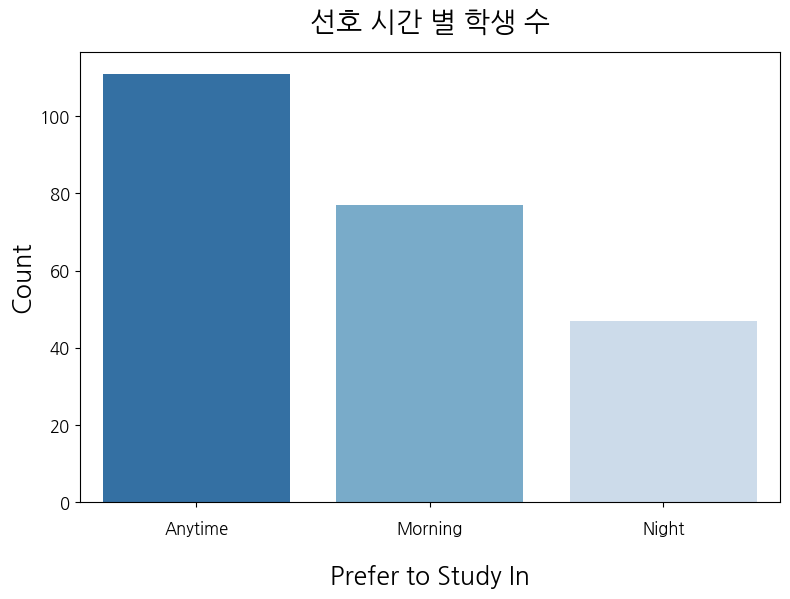

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sorted_data = data['prefer to study in'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="Blues_r")

# 그래프 레이블 설정
plt.xlabel('Prefer to Study In', fontsize=18, labelpad=20)
plt.ylabel('Count', fontsize=18) 
plt.title('선호 시간 별 학생 수', fontsize=20, pad=15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.xticks(fontsize=12, y=-0.02)
plt.show()


### boxplot

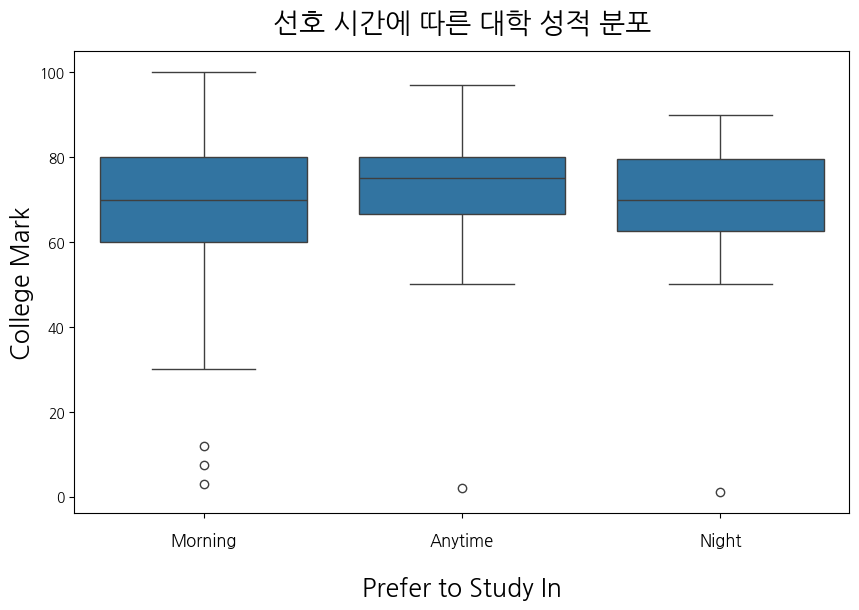

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='prefer to study in', y='college mark')
plt.xlabel('Prefer to Study In', fontsize=18, labelpad=20)  
plt.ylabel('College Mark', fontsize=18)          
plt.title('선호 시간에 따른 대학 성적 분포', fontsize=20, pad=15) 
plt.xticks(fontsize=12, y=-0.02)
plt.show()

### q-q plot

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_75385/739454667.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


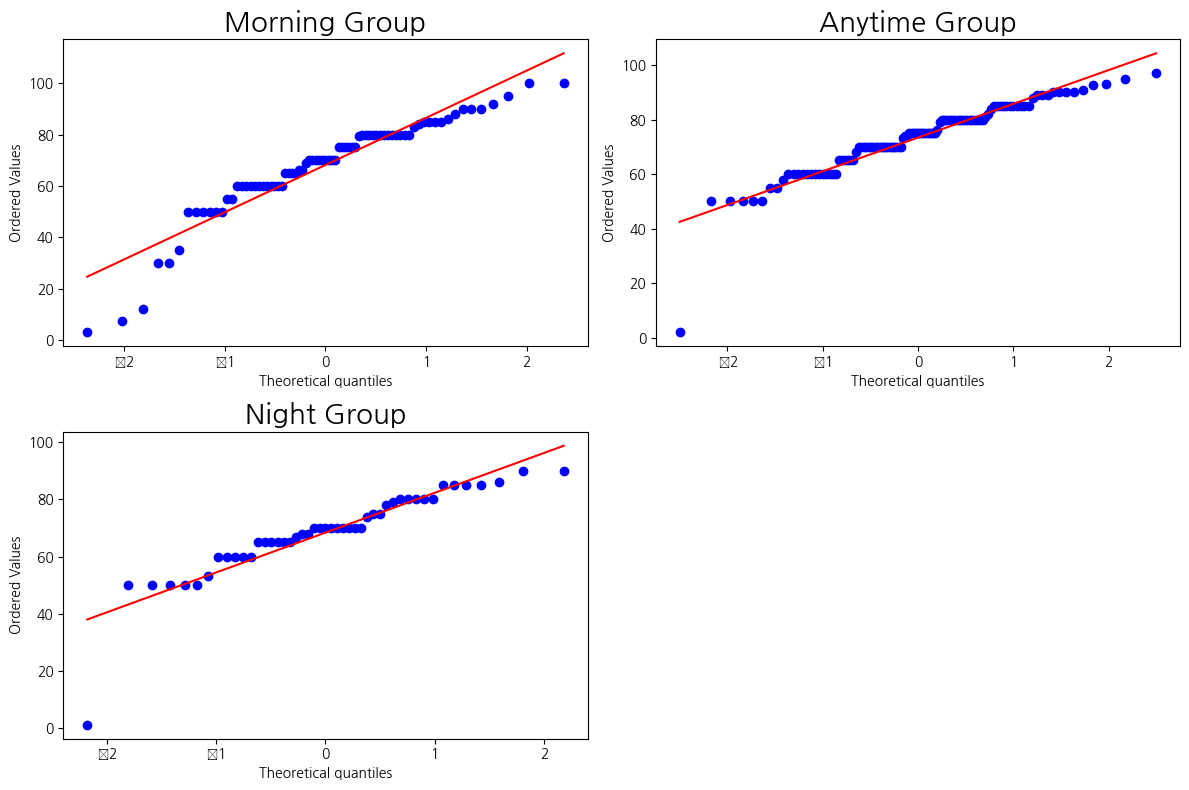

In [10]:
# 정규성 시각화(Q-Q Plot)
groups = data['prefer to study in'].unique()
plt.figure(figsize=(12, 8))

for i, group in enumerate(groups):
    plt.subplot(2, 2, i + 1)
    group_data = data[data['prefer to study in'] == group]['college mark']
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'{group} Group', fontsize=20)

plt.tight_layout()
plt.show()

### Shapiro-Wilk Test

In [11]:
print("Shapiro-Wilk Test Results:")
for group in groups:
    group_data = data[data['prefer to study in'] == group]['college mark']
    stat, p_value = shapiro(group_data)
    print(f"{group}: W={stat:.4f}, p-value={p_value}")

Shapiro-Wilk Test Results:
Morning: W=0.8990, p-value=1.5592280760756694e-05
Anytime: W=0.8949, p-value=2.629047912705573e-07
Night: W=0.8447, p-value=1.88336125575006e-05


### distplot

/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


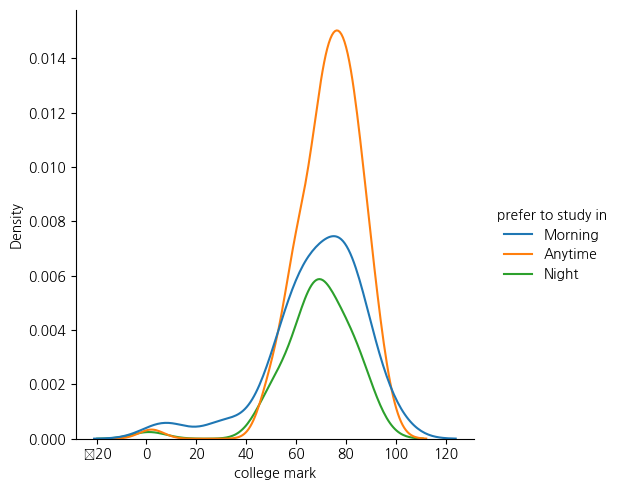

In [12]:
sns.displot(data = data, x = 'college mark', hue = 'prefer to study in', kind = 'kde')

### Levene Test

In [13]:
grouped_data = [data[data['prefer to study in'] == group]['college mark'] for group in groups]

stat, p_value = levene(*grouped_data)
print(f"Levene Test: W={stat:.4f}, p-value={p_value}")

Levene Test: W=3.7058, p-value=0.0260475977589146


### kruskal

In [14]:
stress_groups = data.groupby('prefer to study in')['college mark'].apply(list)

stat_kruskal, p_kruskal = kruskal(*stress_groups)

print(f"Kruskal-Wallis 검정 통계량: {stat_kruskal:.3f}, p-value = {p_kruskal}")

if p_kruskal < 0.05:
    print("p-value가 0.05보다 작으므로, 공부 선호 시간대에 따라 대학 성적에 유의미한 차이가 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 공부 선호 시간대에 따라 대학 성적에 유의미한 차이가 없습니다.")

Kruskal-Wallis 검정 통계량: 5.817, p-value = 0.05455876245308604
p-value가 0.05보다 크므로, 공부 선호 시간대에 따라 대학 성적에 유의미한 차이가 없습니다.


## 2. 스트레스 레벨과 대학 성적에 유의미한 차이가 있는지

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_75385/644783516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="Blues_r")


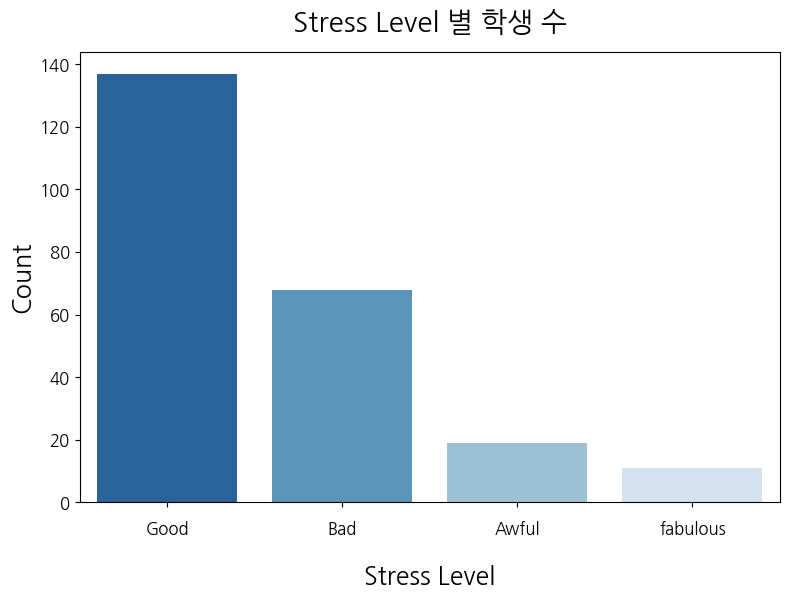

In [15]:
sorted_data = data['Stress Level '].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="Blues_r")

# 그래프 레이블 설정
plt.xlabel('Stress Level', fontsize=18, labelpad=20)
plt.ylabel('Count', fontsize=18) 
plt.title('Stress Level 별 학생 수', fontsize=20, pad=15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.xticks(fontsize=12, y=-0.02)
plt.show()


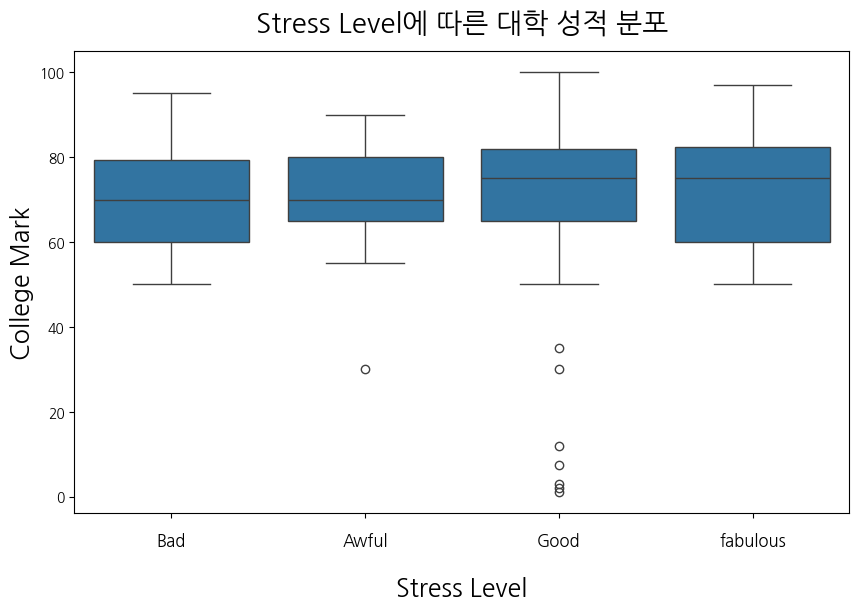

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Stress Level ', y='college mark')
plt.xlabel('Stress Level', fontsize=18, labelpad=20)  
plt.ylabel('College Mark', fontsize=18)          
plt.title('Stress Level에 따른 대학 성적 분포', fontsize=20, pad=15) 
plt.xticks(fontsize=12, y=-0.02)
plt.show()

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_75385/3683171806.py:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


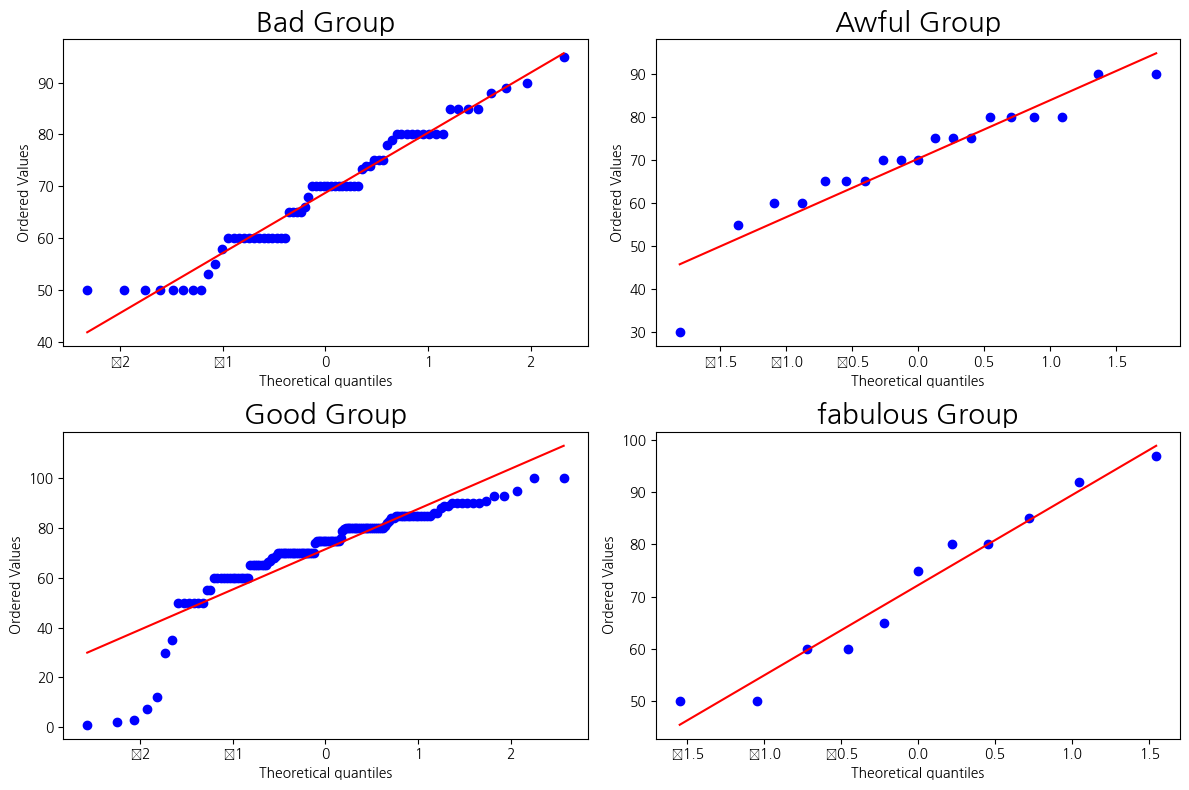

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 정규성 시각화(Q-Q Plot)
groups = data['Stress Level '].unique()
plt.figure(figsize=(12, 8))

for i, group in enumerate(groups):
    plt.subplot(2, 2, i + 1)
    group_data = data[data['Stress Level '] == group]['college mark']
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'{group} Group', fontsize=20)

plt.tight_layout()
plt.show()

In [18]:
# Shapiro-Wilk Test for each group
print("Shapiro-Wilk Test Results:")
for group in groups:
    group_data = data[data['Stress Level '] == group]['college mark']
    stat, p_value = shapiro(group_data)
    print(f"{group}: W={stat:.4f}, p-value={p_value}")

Shapiro-Wilk Test Results:
Bad: W=0.9587, p-value=0.024217065423727036
Awful: W=0.9019, p-value=0.05271768569946289
Good: W=0.8180, p-value=9.548450571883471e-12
fabulous: W=0.9412, p-value=0.5349101424217224


/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


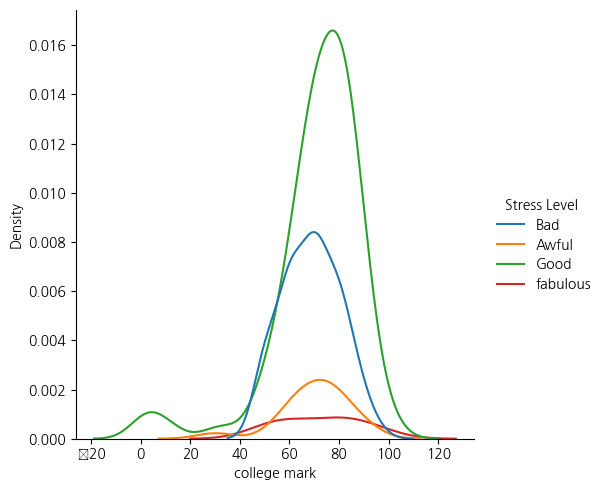

In [19]:
sns.displot(data = data, x = 'college mark', hue = 'Stress Level ', kind = 'kde')

In [20]:
# 그룹별 데이터 추출
grouped_data = [data[data['Stress Level '] == group]['college mark'] for group in groups]

# Levene Test 실행
stat, p_value = levene(*grouped_data)
print(f"Levene Test: W={stat:.4f}, p-value={p_value}")

Levene Test: W=0.9199, p-value=0.43190771637438174


In [21]:
# 그룹별 데이터 추출
grouped_data = [data[data['Stress Level '] == group]['college mark'] for group in groups]

# Kruskal-Wallis Test 실행
stat, p_value = kruskal(*grouped_data)
print(f"Kruskal-Wallis Test: H-statistic={stat:.4f}, p-value={p_value}")

# 결과 해석
if p_value < 0.05:
    print("스트레스 레벨 그룹 간의 성적 차이가 유의미합니다.")
else:
    print("스트레스 레벨 그룹 간의 성적 차이가 유의미하지 않습니다.")


Kruskal-Wallis Test: H-statistic=7.1139, p-value=0.06835412889929356
스트레스 레벨 그룹 간의 성적 차이가 유의미하지 않습니다.


## 3. 일일 공부시간에 따른 대학 성적의 차이가 유의미한지

In [22]:
data.rename(columns={'daily studing time': 'daily studying time'}, inplace=True)

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_75385/1243728748.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="Blues_r")


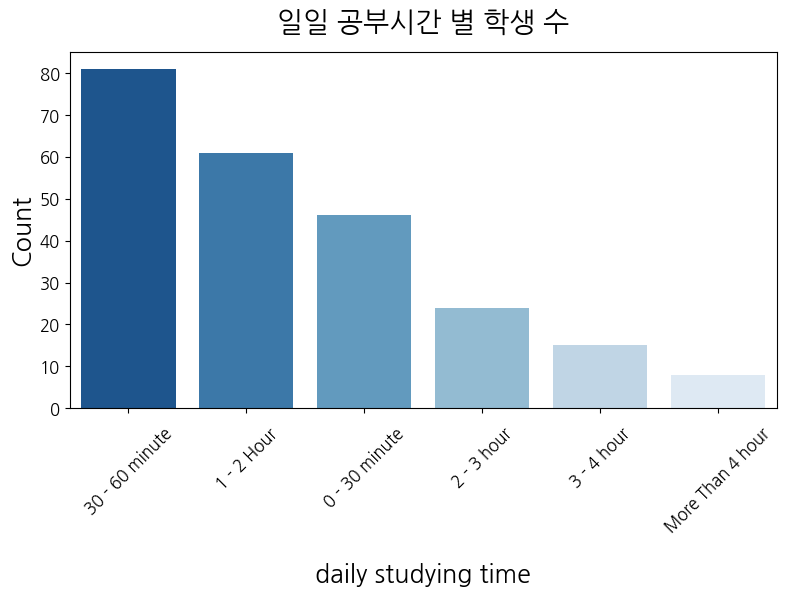

In [23]:
sorted_data = data['daily studying time'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="Blues_r")

# 그래프 레이블 설정
plt.xlabel('daily studying time', fontsize=18, labelpad=20)
plt.ylabel('Count', fontsize=18) 
plt.title('일일 공부시간 별 학생 수', fontsize=20, pad=15)
plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.xticks(fontsize=12, y=-0.02)
plt.show()


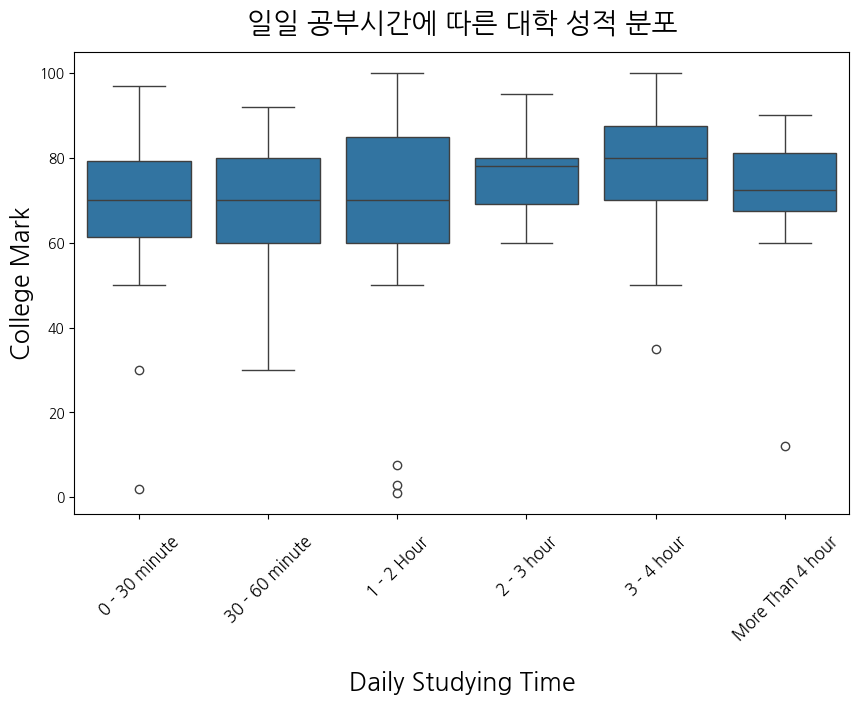

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='daily studying time', y='college mark')
plt.xlabel('Daily Studying Time', fontsize=18, labelpad=20)  
plt.ylabel('College Mark', fontsize=18)          
plt.title('일일 공부시간에 따른 대학 성적 분포', fontsize=20, pad=15) 
plt.xticks(fontsize=12, y=-0.02, rotation=45)
plt.show()

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_75385/1325230873.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


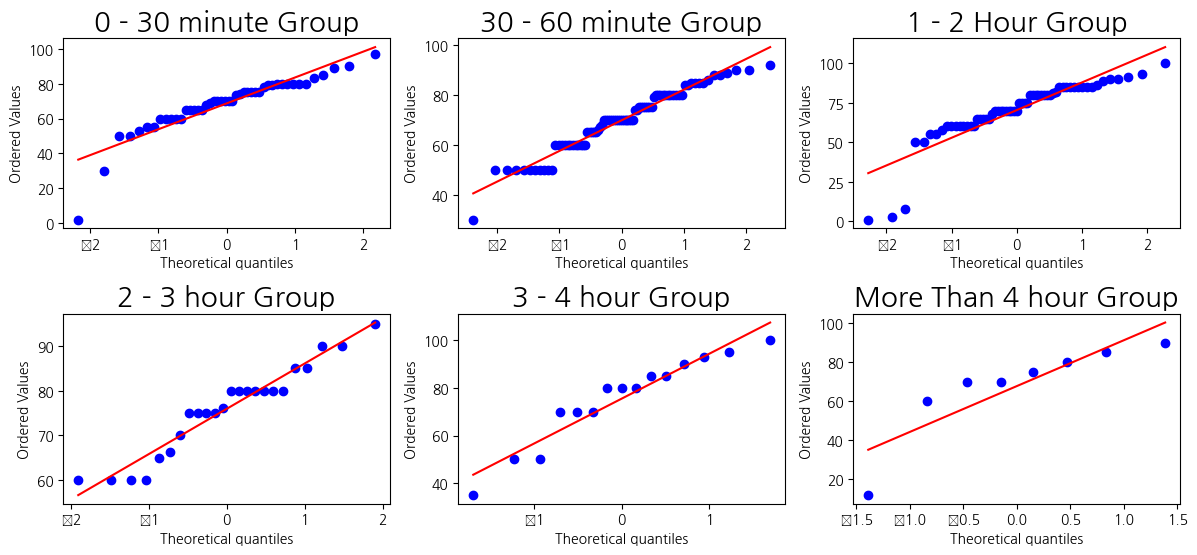

In [25]:
# 정규성 시각화(Q-Q Plot)
groups = data['daily studying time'].unique()
plt.figure(figsize=(12, 8))

for i, group in enumerate(groups):
    plt.subplot(3, 3, i + 1)
    group_data = data[data['daily studying time'] == group]['college mark']
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'{group} Group', fontsize=20)

plt.tight_layout()
plt.show()

In [26]:
# Shapiro-Wilk Test for each group
print("Shapiro-Wilk Test Results:")
for group in groups:
    group_data = data[data['daily studying time'] == group]['college mark']
    stat, p_value = shapiro(group_data)
    print(f"{group}: W={stat:.4f}, p-value={p_value}")

Shapiro-Wilk Test Results:
0 - 30 minute: W=0.8590, p-value=5.322670767782256e-05
30 - 60 minute: W=0.9569, p-value=0.008196129463613033
1 - 2 Hour: W=0.8072, p-value=1.7210558667102305e-07
2 - 3 hour: W=0.9313, p-value=0.10449011623859406
3 - 4 hour: W=0.9183, p-value=0.18115299940109253
More Than 4 hour: W=0.7822, p-value=0.01840345375239849


/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


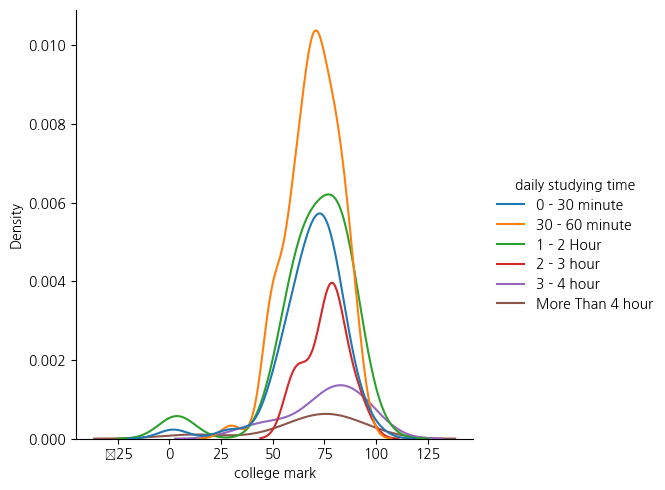

In [27]:
sns.displot(data = data, x = 'college mark', hue = 'daily studying time', kind = 'kde')

In [28]:
# 그룹별 데이터 추출
grouped_data = [data[data['daily studying time'] == group]['college mark'] for group in groups]

# Levene Test 실행
stat, p_value = levene(*grouped_data)
print(f"Levene Test: W={stat:.4f}, p-value={p_value}")

Levene Test: W=1.4017, p-value=0.22450763064026422


In [29]:
# 그룹별 데이터 추출
grouped_data = [data[data['daily studying time'] == group]['college mark'] for group in groups]

# Kruskal-Wallis Test 실행
stat, p_value = kruskal(*grouped_data)
print(f"Kruskal-Wallis Test: H-statistic={stat:.4f}, p-value={p_value}")

# 결과 해석
if p_value < 0.05:
    print("일일 공부 시간에 따른 성적 차이가 유의미합니다.")
else:
    print("일일 공부시간에 따른 성적 차이가 유의미하지 않습니다.")


Kruskal-Wallis Test: H-statistic=8.0479, p-value=0.15361573888095076
일일 공부시간에 따른 성적 차이가 유의미하지 않습니다.


## 4 소셜 미디어/비디오 사용 시간에 따른 성적의 차이가 유의미한지

In [30]:
data.rename(columns={'social medai & video': 'social media & video'}, inplace=True)

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_75385/290954993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="Blues_r")


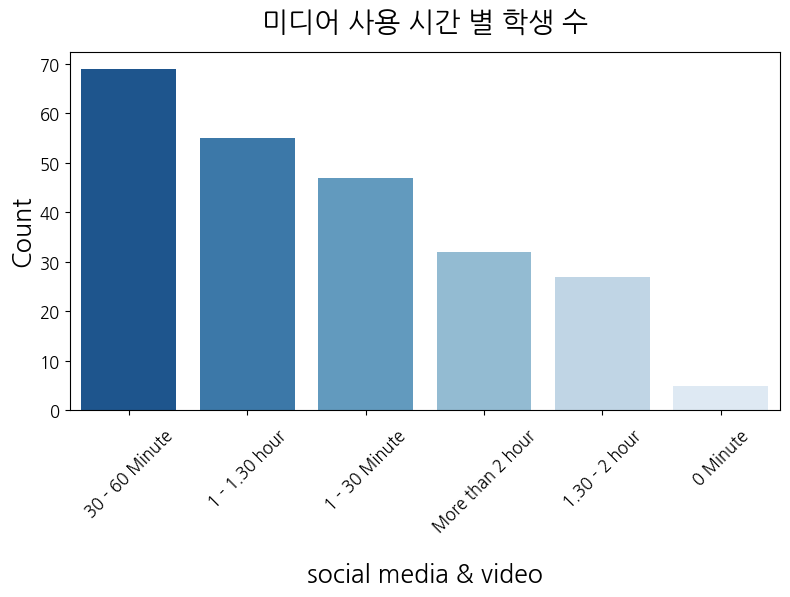

In [31]:
sorted_data = data['social media & video'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values, palette="Blues_r")

# 그래프 레이블 설정
plt.xlabel('social media & video', fontsize=18, labelpad=20)
plt.ylabel('Count', fontsize=18) 
plt.title('미디어 사용 시간 별 학생 수', fontsize=20, pad=15)
plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.xticks(fontsize=12, y=-0.02)
plt.show()


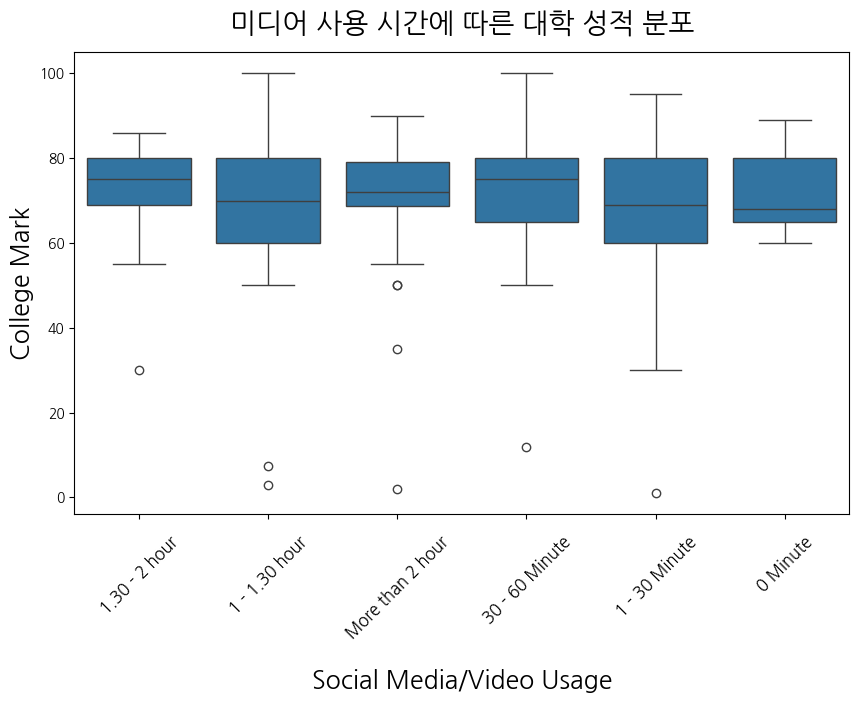

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='social media & video', y='college mark')
plt.xlabel('Social Media/Video Usage', fontsize=18, labelpad=20)  
plt.ylabel('College Mark', fontsize=18)          
plt.title('미디어 사용 시간에 따른 대학 성적 분포', fontsize=20, pad=15) 
plt.xticks(fontsize=12, y=-0.02, rotation=45)
plt.show()

In [33]:
# social media & videos 행 숫자로 변경
def convert_hours(time):
    time = time.strip()
    if "0 Minute" == time :
        return 0
    elif "1 - 30 Minute" == time:
        return 0.25
    elif "30 - 60 Minute" == time:
        return 0.75
    elif "1 - 1.30 hour" == time:
        return 1.25
    elif "1.30 - 2 hour" == time:
        return 1.75
    elif "More than 2 hour" == time:
        return 2.25
        
data["social media & video hours"] = data["social media & video"].apply(convert_hours)

#1을 기준으로 1시간 이하 사용, 1시간 이상 사용으로 그룹화 
median = 1
low_use = data[data["social media & video hours"] <= median]["college mark"]
high_use = data[data["social media & video hours"] > median]["college mark"]

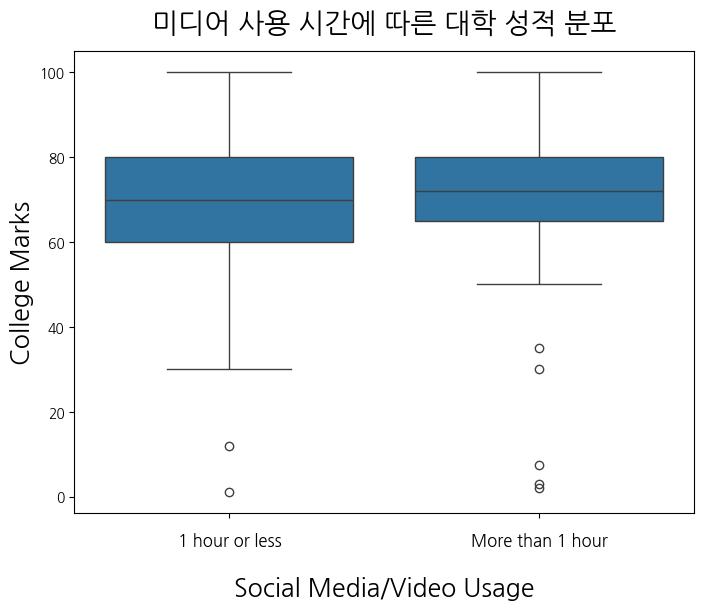

In [34]:
grouped_data = pd.DataFrame({
    "Group": ["1 hour or less"] * len(low_use) + ["More than 1 hour"] * len(high_use),
    "College Mark": pd.concat([low_use, high_use])
})

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data=grouped_data, x="Group", y="College Mark")
plt.title('미디어 사용 시간에 따른 대학 성적 분포', fontsize=20, pad=15) 
plt.xticks(fontsize=12, y=-0.02)
plt.xlabel('Social Media/Video Usage', fontsize=18, labelpad=20)  
plt.ylabel("College Marks", fontsize=18)
plt.show()

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_75385/386170885.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


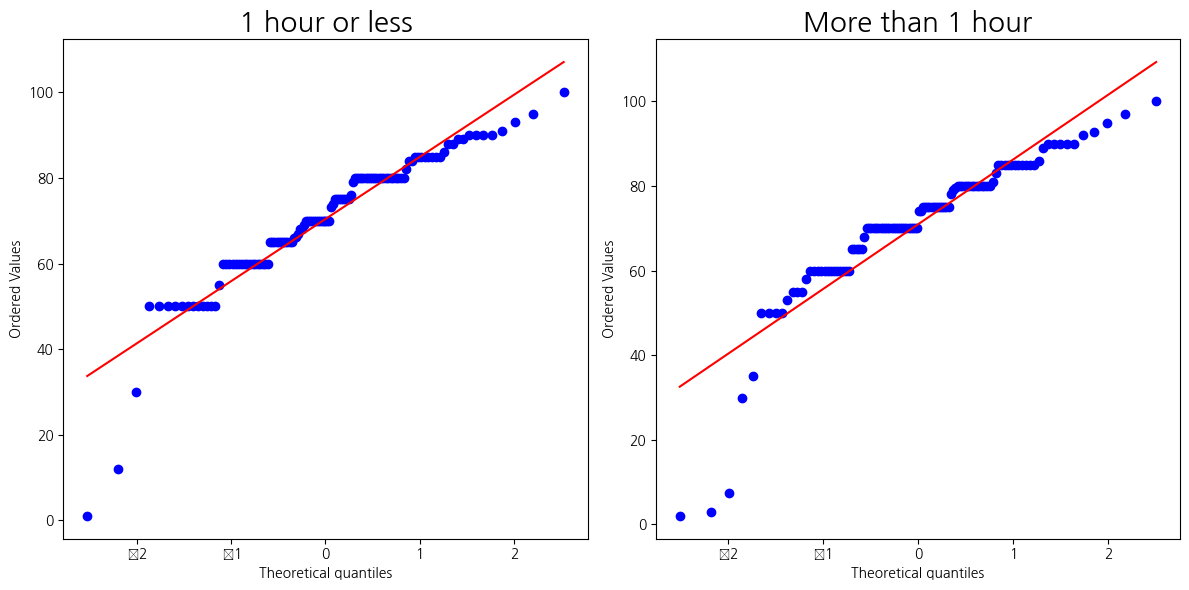

In [35]:
# 그룹별로 QQ plot을 그리기 위한 작업
plt.figure(figsize=(12, 6))

# 1시간 이하
plt.subplot(1, 2, 1)
stats.probplot(grouped_data[grouped_data['Group'] == "1 hour or less"]['College Mark'], dist="norm", plot=plt)
plt.title('1 hour or less', fontsize=20)

# 1시간 초과
plt.subplot(1, 2, 2)
stats.probplot(grouped_data[grouped_data['Group'] == "More than 1 hour"]['College Mark'], dist="norm", plot=plt)
plt.title('More than 1 hour', fontsize=20)

plt.tight_layout()
plt.show()

In [37]:
print(shapiro(low_use))
print(shapiro(high_use))

ShapiroResult(statistic=0.9056746959686279, pvalue=3.531681613822002e-07)
ShapiroResult(statistic=0.8488395810127258, pvalue=1.9900090464375353e-09)


/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


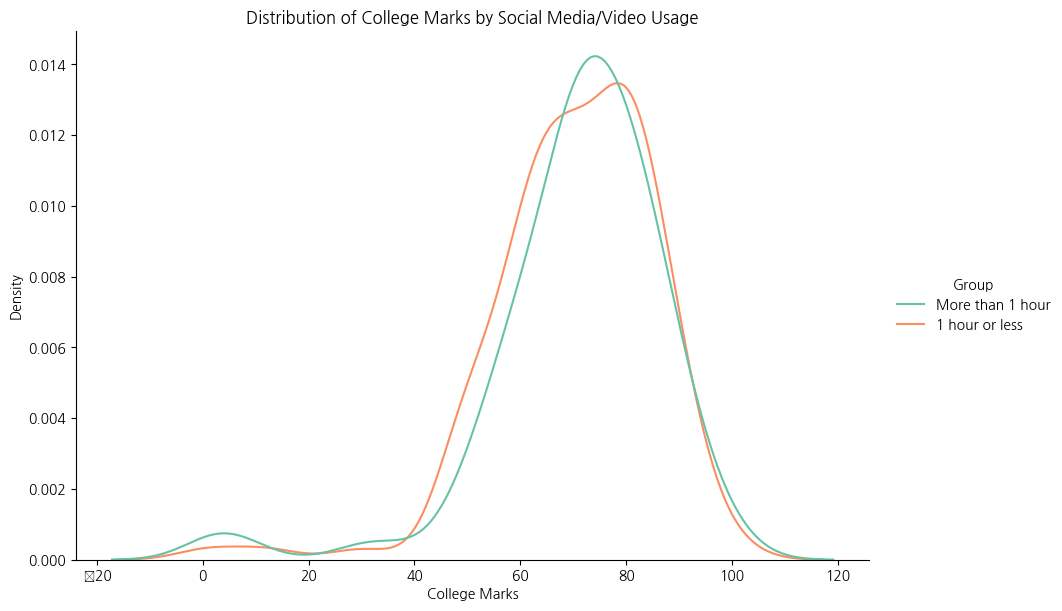

In [38]:
data['Group'] = data['social media & video hours'].apply(lambda x: '1 hour or less' if x <= median else 'More than 1 hour')

# KDE 플롯 그리기
sns.displot(data=data, x='college mark', hue='Group', kind='kde', height=6, aspect=1.5, palette="Set2")
plt.title("Distribution of College Marks by Social Media/Video Usage")
plt.xlabel("College Marks")
plt.ylabel("Density")
plt.show()

In [39]:
group_1 = grouped_data[grouped_data["Group"] == "1 hour or less"]["College Mark"]
group_2 = grouped_data[grouped_data["Group"] == "More than 1 hour"]["College Mark"]

# Levene's Test
stat, p_value = levene(group_1, group_2)

# 결과 출력
print(f"Levene's Test: stat={stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print("등분산성을 만족합니다. (귀무가설 채택)")
else:
    print("등분산성을 만족하지 않습니다. (귀무가설 기각)")

Levene's Test: stat=0.0163, p-value=0.8986
등분산성을 만족합니다. (귀무가설 채택)


In [40]:
# Kruskal-Wallis Test
stat, p_value = kruskal(group_1, group_2)

# 결과 출력
print(f"Kruskal-Wallis Test: stat={stat:.4f}, p-value={p_value}")

if p_value > 0.05:
    print("두 그룹 간 차이가 유의미하지 않습니다. (귀무가설 채택)")
else:
    print("두 그룹 간 차이가 유의미합니다. (귀무가설 기각)")

Kruskal-Wallis Test: stat=0.3915, p-value=0.5315290547250976
두 그룹 간 차이가 유의미하지 않습니다. (귀무가설 채택)


## 5. 10학년 성적과 대학 성적간의 상관관계

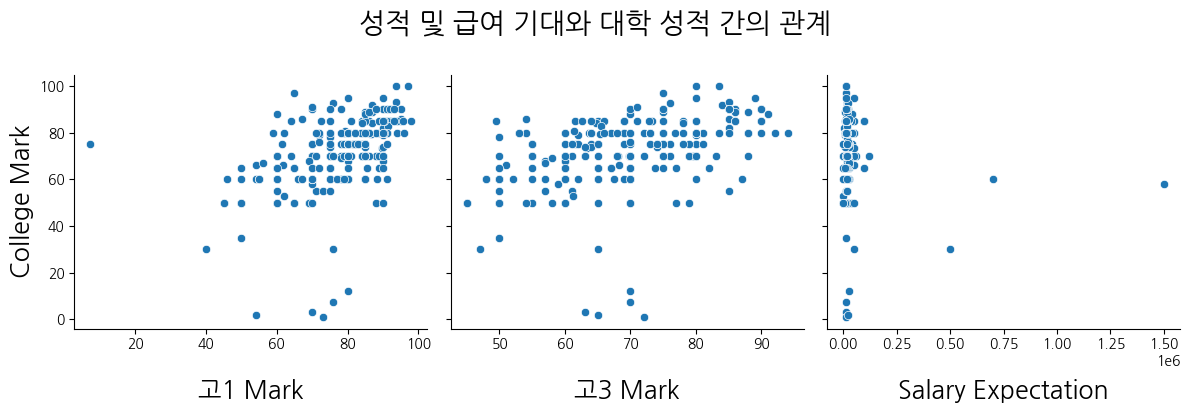

In [41]:
pair_plot = sns.pairplot(
    data, 
    x_vars=['10th Mark', '12th Mark', 'salary expectation'], 
    y_vars=['college mark'], 
    height=4, 
    aspect=1, 
    kind='scatter'
)

pair_plot.fig.suptitle('성적 및 급여 기대와 대학 성적 간의 관계', fontsize=20, y=1.02)  # y 값으로 제목 간격 조정

# 각 플롯의 x축 제목 수정
x_labels = ['고1 Mark', '고3 Mark', 'Salary Expectation']
for i, ax in enumerate(pair_plot.axes.flatten()):
    ax.set_xlabel(x_labels[i], fontsize=18, labelpad=20)  # x축 개별 제목 설정
    ax.set_ylabel('College Mark', fontsize=18)  # y축 제목 설정

# 그래프 보여주기
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


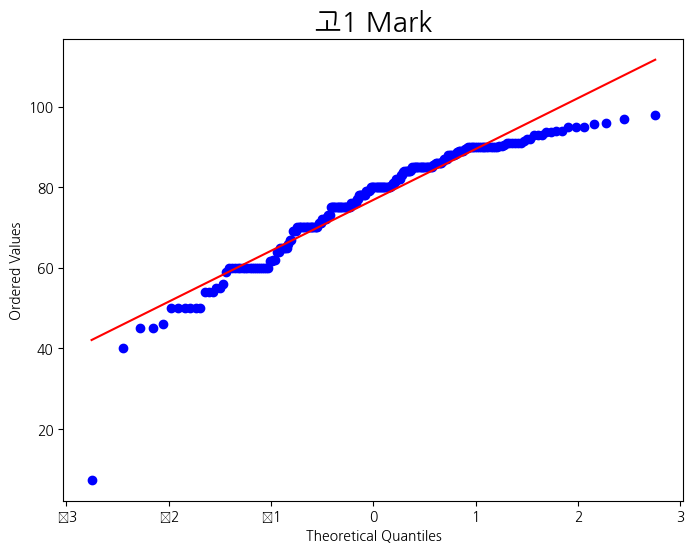

In [42]:
# Q-Q 플롯 생성
plt.figure(figsize=(8, 6))
stats.probplot(data['10th Mark'], dist="norm", plot=plt)
plt.title('고1 Mark', fontsize=20)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [43]:
# Shapiro-Wilk Test
stat, p_value = shapiro(data['10th Mark'])

print(f"p-value: {p_value:.4e}")

# 결과 해석
if p_value > 0.05:
    print("데이터는 정규분포를 따릅니다 (p-value > 0.05).")
else:
    print("데이터는 정규분포를 따르지 않습니다 (p-value <= 0.05).")


p-value: 1.6565e-09
데이터는 정규분포를 따르지 않습니다 (p-value <= 0.05).


In [44]:
spearman_corr, spearman_p_value = spearmanr(data["10th Mark"], data["college mark"])
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value}")

Spearman Correlation: 0.5580, p-value: 1.2492939041210209e-20


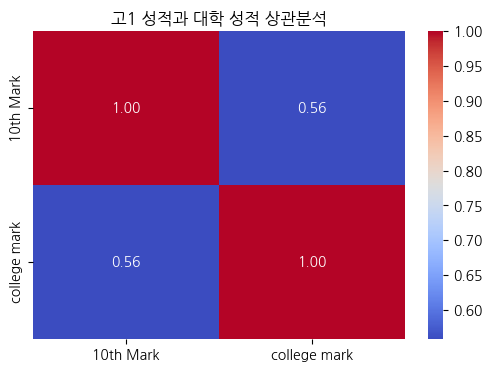

In [45]:
selected_columns = ["10th Mark", "college mark"]
correlation_matrix = data[selected_columns].corr(method='spearman')

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("고1 성적과 대학 성적 상관분석")
plt.show()

## 회귀분석

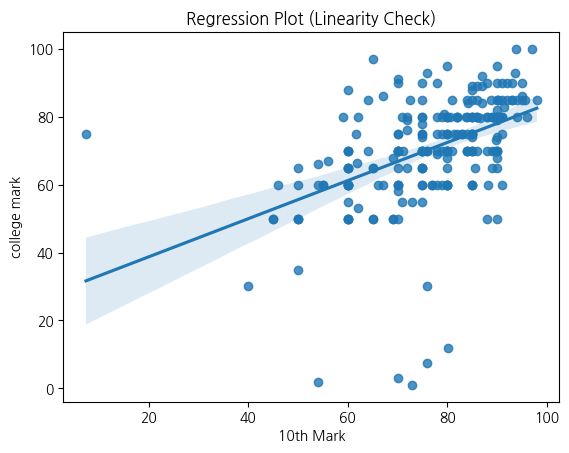

In [46]:
sns.regplot(data=data, x='10th Mark', y='college mark')
plt.title("Regression Plot (Linearity Check)")
plt.show()

/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


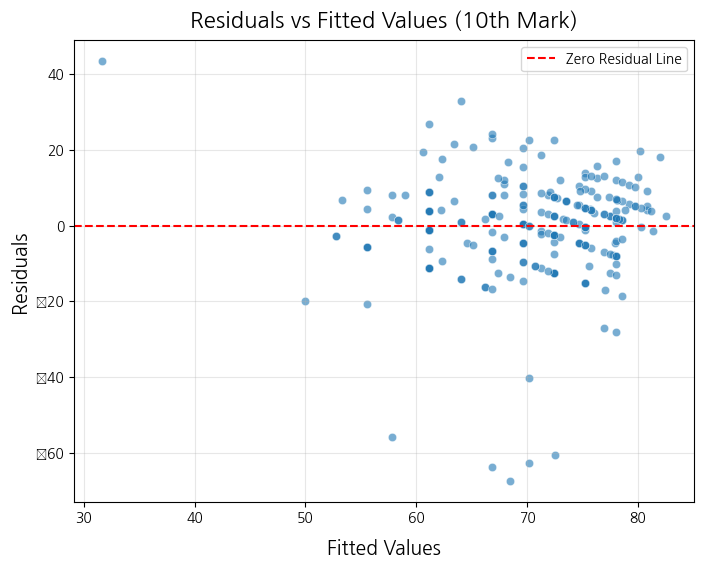

In [48]:
import statsmodels.api as sm

# 고1 성적(X)과 대학 성적(y) 데이터 준비
X_10th = sm.add_constant(data["10th Mark"])  # 상수항 추가
y_college = data["college mark"]

# OLS 모델 적합
model_ols = sm.OLS(y_college, X_10th).fit()
y_pred_10th = model_ols.predict(X_10th)  # 예측값
residuals = y_college - y_pred_10th  # 잔차

# Residuals vs Fitted Values Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_10th, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Zero Residual Line')
plt.title("Residuals vs Fitted Values (10th Mark)", fontsize=16, pad = 10)
plt.xlabel("Fitted Values", fontsize=14, labelpad = 10)
plt.ylabel("Residuals", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


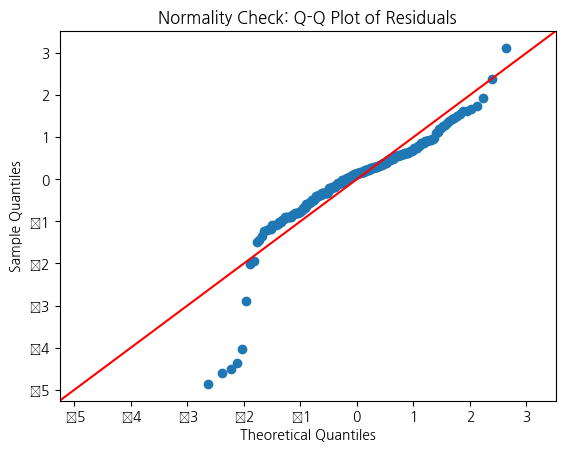

In [54]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Normality Check: Q-Q Plot of Residuals")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


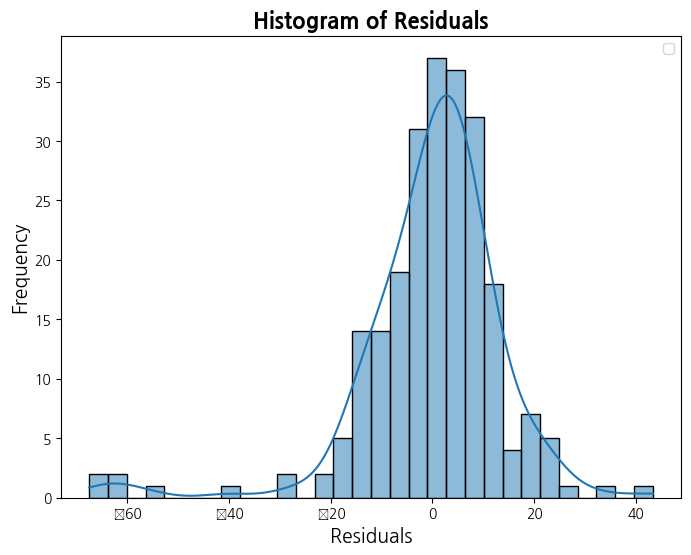

In [55]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals", fontsize=16, fontweight='bold')
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.show()

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 데이터 준비
X = sm.add_constant(data["10th Mark"])  # 상수항 추가
y = data["college mark"]

# OLS 모델 적합
model_ols = sm.OLS(y, X).fit()

# 결과 출력
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           college mark   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     64.58
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.62e-14
Time:                        03:47:58   Log-Likelihood:                -951.72
No. Observations:                 235   AIC:                             1907.
Df Residuals:                     233   BIC:                             1914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.5066      5.446      5.050      0.0

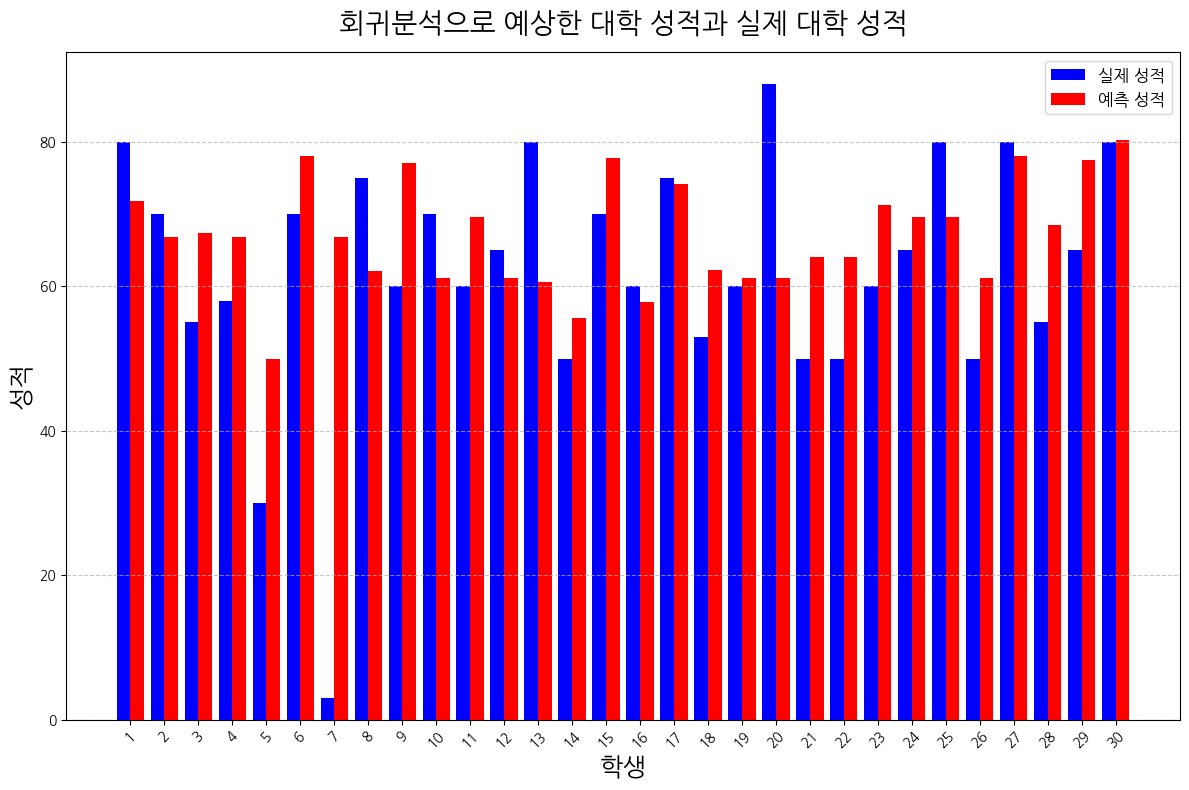

In [57]:
y_pred = model_ols.predict(X)
index = np.arange(len(y))
subset_index = index[:30]
subset_y = y[:30]
subset_y_pred = y_pred[:30]

# 학생 번호로 레이블 생성
student_labels = [f'{i+1}' for i in subset_index]

# 부분 데이터로 그래프 생성
plt.figure(figsize=(12, 8))
width = 0.4  # 막대 너비

# 실제 값과 예측 값 막대 그래프
plt.bar(subset_index - width/2, subset_y, width=width, color='blue', label='실제 성적')
plt.bar(subset_index + width/2, subset_y_pred, width=width, color='red', label='예측 성적')

# 그래프 설정
plt.title('회귀분석으로 예상한 대학 성적과 실제 대학 성적', fontsize=20, pad=15)
plt.xlabel('학생', fontsize=18)
plt.ylabel('성적', fontsize=18)
plt.xticks(subset_index, student_labels, rotation=45, fontsize=10)
plt.legend(fontsize=12)

# 그리드 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에만 점선으로 그리드 추가

plt.tight_layout()

# 그래프 표시
plt.show()


In [59]:
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 13.886917650975516
